In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [0]:
#table = pd.read_csv('table_output_regression.csv',encoding='utf-8')
table = pd.read_csv('table_output.csv',encoding='utf-8')
table["Date"]= pd.to_datetime(table["Date"],format='%d/%m/%Y')
print(table.shape)
table.head()

(1355, 22)


,Date,Open,High,Low,Close,Volume%,Volume,Weighted_bitcoin_price,Address,generatedCoin,...,Volume_litecoin,Weighted_gold_price,Oil_price,usd/euro,Num_Wiki_view,Num_tweets,3d MA,9d MA,15d MA,Lable
0,2015-07-01,263.35,265.17,255.77,258.62,-0.19,103669.69660,260.73,309193,3375,...,1.782752e+06,1173.51,48.69,1.1053,12957,29052,259.58,256.79,248.84,258.62
1,2015-07-02,258.55,261.63,254.12,255.41,-0.11,83719.45772,257.43,316488,3850,...,1.564294e+06,1167.64,48.69,1.1084,9802,27119,259.03,257.55,249.28,255.41
2,2015-07-03,255.46,257.08,253.51,256.34,-0.19,74467.13615,255.60,301162,4025,...,1.046768e+06,1167.45,53.95,1.1114,8307,25771,256.79,263.05,249.80,256.34
3,2015-07-04,256.49,261.46,254.20,260.89,1.74,60483.23395,258.26,377347,3800,...,9.584088e+05,1167.45,53.95,1.1114,8947,23847,257.55,267.28,250.97,260.89
4,2015-07-05,260.80,274.51,258.70,271.91,0.09,165701.36600,266.48,307720,3550,...,3.112677e+06,1170.43,58.99,1.1056,8692,24976,263.05,269.05,252.36,271.91


In [0]:

table=table.drop(["15d MA","usd/euro", "Num_tweets","Oil_price", "Volume","Num_Wiki_view", "Address", "Weighted_gold_price", "Mining_Difficulty", "generatedCoin", "Volume_litecoin", "Weighted_litecoin_price", "Weighted_bitcoin_price", "3d MA"],axis=1)


In [0]:
table = table.set_index(pd.DatetimeIndex(table['Date']))
table=table.drop(["Date"], axis=1)
print(table.shape)
table.head()


(1355, 7)


,Open,High,Low,Close,Volume%,9d MA,Lable
Date,,,,,,,
2015-07-01,263.35,265.17,255.77,258.62,-0.19,256.79,258.62
2015-07-02,258.55,261.63,254.12,255.41,-0.11,257.55,255.41
2015-07-03,255.46,257.08,253.51,256.34,-0.19,263.05,256.34
2015-07-04,256.49,261.46,254.20,260.89,1.74,267.28,260.89
2015-07-05,260.80,274.51,258.70,271.91,0.09,269.05,271.91


In [0]:
train = table['2015-07-01':'2018-11-1']
#validation = table['2018-3-3':'2018-11-1']
#976, 244, 135
test = table['2018-11-2':'2019-03-16']
train=train.values
train_original=train.astype('float32')
test=test.values
test_original=test.astype('float32')
scaler_train = MinMaxScaler(feature_range=(0, 1))
train = scaler_train.fit_transform(train_original)
scaler_test = MinMaxScaler(feature_range=(0, 1))
test = scaler_test.fit_transform(test_original)
print(train.shape)
#print(validation.shape)
print(test.shape)

(1220, 7)
(135, 7)


In [0]:
X_train = []
y_train = []
timestamp = 10
for i in range(timestamp, train.shape[0]):
    X_train.append(train[i-timestamp:i, :-1])
    y_train.append(train[i, -1])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
#print(train[1:11, :-1])
#print(train[1:11, -1])


print(X_train.shape)
print(y_train.shape)

X_test = []
y_test = []
for i in range(timestamp, test.shape[0]):
    X_test.append(test[i-timestamp:i, :-1])
    y_test.append(test[i, -1])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], X_train.shape[2]))
#print(train[1:11, :-1])
#print(train[1:11, -1])
print(X_test.shape)
print(y_test.shape)

(1210, 10, 6)
(1210,)
(125, 10, 6)
(125,)


In [0]:
X_train_split = X_train[:1085,:,:]
y_train_split = y_train[:1085,]
X_valid = X_train[1085:,:,:]
y_valid = y_train[1085:,]
print(X_train_split.shape)
print(y_train_split.shape)
print(X_valid.shape)
print(y_valid.shape)

(1085, 10, 6)
(1085,)
(125, 10, 6)
(125,)


In [0]:
#from keras import backend
#def rmse(y_true, y_pred):
#    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

Train on 1085 samples, validate on 125 samples
Epoch 1/170
 - 13s - loss: 0.0802 - val_loss: 0.0094
Epoch 2/170
 - 2s - loss: 0.0157 - val_loss: 0.0123
Epoch 3/170
 - 2s - loss: 0.0239 - val_loss: 0.0075
Epoch 4/170
 - 2s - loss: 0.0272 - val_loss: 0.0076
Epoch 5/170
 - 2s - loss: 0.0343 - val_loss: 6.8088e-04
Epoch 6/170
 - 2s - loss: 0.0264 - val_loss: 4.5034e-04
Epoch 7/170
 - 2s - loss: 0.0144 - val_loss: 9.6569e-04
Epoch 8/170
 - 2s - loss: 0.0084 - val_loss: 4.8379e-04
Epoch 9/170
 - 1s - loss: 0.0023 - val_loss: 0.0026
Epoch 10/170
 - 1s - loss: 0.0064 - val_loss: 7.1475e-04
Epoch 11/170
 - 1s - loss: 0.0255 - val_loss: 0.0331
Epoch 12/170
 - 2s - loss: 0.0162 - val_loss: 0.0036
Epoch 13/170
 - 2s - loss: 0.0193 - val_loss: 0.0269
Epoch 14/170
 - 1s - loss: 0.0062 - val_loss: 4.7459e-04
Epoch 15/170
 - 1s - loss: 0.0028 - val_loss: 0.0027
Epoch 16/170
 - 2s - loss: 0.0128 - val_loss: 0.0188
Epoch 17/170
 - 2s - loss: 0.0034 - val_loss: 0.0020
Epoch 18/170
 - 2s - loss: 0.0049 - 

 - 1s - loss: 0.0070 - val_loss: 0.0080
Epoch 150/170
 - 1s - loss: 0.0054 - val_loss: 0.0057
Epoch 151/170
 - 1s - loss: 0.0048 - val_loss: 0.0018
Epoch 152/170
 - 1s - loss: 0.0047 - val_loss: 0.0067
Epoch 153/170
 - 2s - loss: 0.0060 - val_loss: 0.0030
Epoch 154/170
 - 1s - loss: 0.0037 - val_loss: 0.0020
Epoch 155/170
 - 1s - loss: 0.0045 - val_loss: 0.0076
Epoch 156/170
 - 2s - loss: 0.0054 - val_loss: 0.0032
Epoch 157/170
 - 2s - loss: 0.0034 - val_loss: 0.0034
Epoch 158/170
 - 2s - loss: 0.0035 - val_loss: 0.0053
Epoch 159/170
 - 2s - loss: 0.0036 - val_loss: 0.0027
Epoch 160/170
 - 2s - loss: 0.0032 - val_loss: 0.0039
Epoch 161/170
 - 2s - loss: 0.0034 - val_loss: 0.0041
Epoch 162/170
 - 2s - loss: 0.0034 - val_loss: 0.0043
Epoch 163/170
 - 2s - loss: 0.0029 - val_loss: 0.0035
Epoch 164/170
 - 2s - loss: 0.0033 - val_loss: 0.0054
Epoch 165/170
 - 2s - loss: 0.0032 - val_loss: 0.0039
Epoch 166/170
 - 2s - loss: 0.0040 - val_loss: 0.0054
Epoch 167/170
 - 2s - loss: 0.0035 - val_l

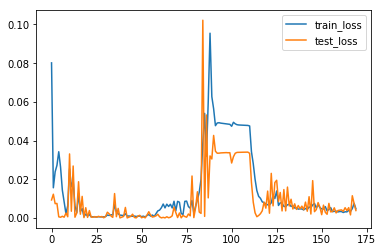

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import adam

regressor = Sequential()

regressor.add(LSTM(units = 256, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 256, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 128))
#regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

opt = adam(lr=0.005, decay=0)

#regressor.compile(optimizer = opt, loss = 'mean_squared_error',metrics=[rmse])
regressor.compile(optimizer = opt, loss = 'mean_squared_error')
#history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 8, validation_data=(X_test, y_test), verbose=2, shuffle=False)
history = regressor.fit(X_train_split, y_train_split, epochs = 170, batch_size = 32, validation_data=(X_valid, y_valid), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train_loss')
pyplot.plot(history.history['val_loss'], label='test_loss')
#pyplot.plot(history.history['rmse'], label='train_rmse')
#pyplot.plot(history.history['val_rmse'], label='test_rmse')
pyplot.legend()
pyplot.show()

In [0]:
predicted_price_valid = regressor.predict(X_valid)

In [0]:
inv_yhat = concatenate((train[1085+timestamp:, :-1], predicted_price_valid), axis=1)
inv_yhat = scaler_train.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
print(inv_yhat)
print(len(inv_yhat))

[7814.421  7668.6953 7572.703  7365.836  7363.415  7487.221  7411.9478
 7444.4766 7401.317  7372.1035 7522.6943 7575.5415 7648.2397 7686.9795
 7660.2534 7720.2817 7676.043  7735.115  7696.5747 7651.445  7576.142
 7518.9453 7485.0884 7499.3765 7477.5635 7526.4624 7696.4575 8031.3125
 8207.822  8196.09   8164.9854 8124.3276 8161.2593 8321.652  8705.21
 8696.164  8675.368  8730.257  8750.618  8683.644  8601.328  8484.008
 8348.086  8327.263  8254.233  8121.763  8004.591  7931.613  7831.148
 7664.185  7669.205  7720.05   7601.261  7754.7915 7661.4707 7701.45
 7807.309  7746.249  7810.044  7796.5293 7748.9688 7709.186  7584.301
 7732.0356 7700.281  7776.075  7801.7085 7761.5884 7804.396  7931.07
 7903.101  7927.8203 8005.4126 8059.053  8146.6147 8105.295  8059.753
 7912.099  7722.8516 7671.0156 7594.9644 7577.7656 7563.658  7571.036
 7564.8296 7591.3486 7693.1675 7645.963  7598.5806 7535.4395 7520.0063
 7572.6514 7485.1616 7699.624  7685.5293 7655.9224 7605.031  7572.0464
 7571.1025 7697.83

In [0]:
inv_y = train_original[1085+timestamp:,-1]
print(inv_y)
print(len(inv_y))

[6404.   6385.82 6614.18 6529.59 6597.55 6639.14 6673.5  6856.93 6773.88
 6741.75 6329.95 6394.71 6228.81 6238.05 6276.12 6359.64 6741.75 7321.04
 7370.78 7466.86 7354.13 7419.29 7418.49 7711.11 8424.27 8181.39 7951.58
 8165.01 8192.15 8218.46 8180.48 7780.44 7624.91 7567.15 7434.39 7032.85
 7068.48 6951.8  6753.12 6305.8  6568.23 6184.71 6295.73 6322.69 6297.57
 6199.71 6308.52 6334.73 6580.63 6423.76 6506.07 6308.53 6488.76 6376.71
 6534.88 6719.96 6763.19 6707.26 6884.64 7096.28 7047.16 6978.23 7037.58
 7193.25 7272.72 7260.06 7361.66 6792.83 6529.17 6467.07 6225.98 6300.86
 6329.7  6321.2  6351.8  6517.31 6512.71 6543.2  6517.18 6281.2  6371.3
 6398.54 6519.67 6734.95 6721.98 6710.63 6595.41 6446.47 6495.   6676.75
 6644.13 6601.96 6625.56 6589.62 6556.1  6502.59 6576.69 6622.48 6588.31
 6602.95 6652.23 6642.64 6585.53 6256.24 6274.58 6285.99 6290.93 6596.54
 6596.11 6544.43 6476.71 6465.41 6489.19 6482.35 6487.16 6475.74 6495.84
 6476.29 6474.75 6480.38 6486.39 6332.63 6334.27 631

In [0]:
rmse = sqrt(mean_squared_error(inv_yhat, inv_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1206.958


In [0]:
len(inv_yhat)

125

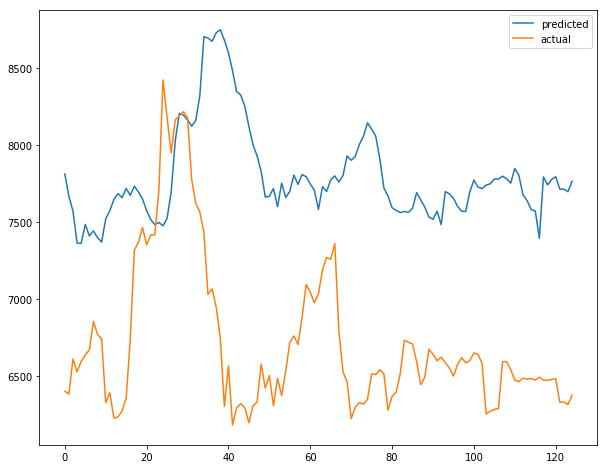

In [0]:
pyplot.figure(figsize=(10,8))
pyplot.plot(inv_yhat, label='predicted')
pyplot.plot(inv_y, label='true')
plt.legend(["predicted","actual"])

In [0]:
def get_label(close_price):
    label = []
    for i in range(len(close_price)-1):
        if close_price[i]<=close_price[i+1]:
            label.append("Rise")
        else:
            label.append("Fall")
    return label

In [0]:
predicted_trend = get_label(inv_yhat)
actual_trend = get_label(inv_y)
count=0
for i in range(len(predicted_trend)):
    if predicted_trend[i] == actual_trend[i]:
        count = count+1
accuracy_rate = count/len(actual_trend)
print(accuracy_rate)

0.532258064516129


### Test Set Prediction

Epoch 1/140
 - 14s - loss: 0.0055
Epoch 2/140
 - 2s - loss: 0.0188
Epoch 3/140
 - 2s - loss: 0.0275
Epoch 4/140
 - 2s - loss: 0.0251
Epoch 5/140
 - 2s - loss: 0.0246
Epoch 6/140
 - 2s - loss: 0.0127
Epoch 7/140
 - 2s - loss: 0.0096
Epoch 8/140
 - 2s - loss: 0.0074
Epoch 9/140
 - 2s - loss: 0.0133
Epoch 10/140
 - 2s - loss: 0.0065
Epoch 11/140
 - 2s - loss: 0.0068
Epoch 12/140
 - 2s - loss: 0.0028
Epoch 13/140
 - 2s - loss: 0.0015
Epoch 14/140
 - 2s - loss: 0.0029
Epoch 15/140
 - 2s - loss: 0.0052
Epoch 16/140
 - 2s - loss: 0.0070
Epoch 17/140
 - 2s - loss: 0.0024
Epoch 18/140
 - 2s - loss: 0.0012
Epoch 19/140
 - 2s - loss: 0.0015
Epoch 20/140
 - 2s - loss: 0.0025
Epoch 21/140
 - 2s - loss: 0.0011
Epoch 22/140
 - 2s - loss: 7.4336e-04
Epoch 23/140
 - 2s - loss: 9.4147e-04
Epoch 24/140
 - 2s - loss: 8.9201e-04
Epoch 25/140
 - 2s - loss: 7.2804e-04
Epoch 26/140
 - 2s - loss: 8.5115e-04
Epoch 27/140
 - 2s - loss: 0.0010
Epoch 28/140
 - 2s - loss: 0.0010
Epoch 29/140
 - 2s - loss: 8.5947e-0

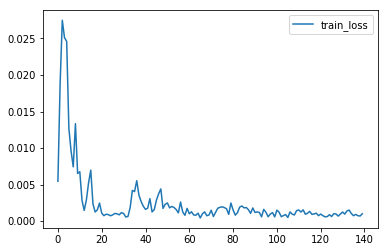

In [0]:
regressor = Sequential()

regressor.add(LSTM(units = 256, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 256, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 128))
#regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))

opt = adam(lr=0.002, decay=0)

regressor.compile(optimizer = opt, loss = 'mean_squared_error')

#history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 8, validation_data=(X_test, y_test), verbose=2, shuffle=False)
history = regressor.fit(X_train, y_train, epochs = 140, batch_size = 32, verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train_loss')
#pyplot.plot(history.history['val_loss'], label='test_loss')
pyplot.legend()
pyplot.show()

In [0]:
predicted_price = regressor.predict(X_test)

In [0]:
X_Test_re=[]
print(range(X_test.shape[0]))
for i in range(X_test.shape[0]):
    X_Test_re.append(X_test[i][0])
for i in range(0,timestamp):
    X_Test_re.append(X_test[X_test.shape[0]-1][i])
print(len(X_Test_re))
X_Test_re = np.array(X_Test_re).reshape(X_test.shape[0]+timestamp, X_test.shape[2])
X_Test_re[timestamp:].shape

range(0, 125)
135


(125, 6)

In [0]:
X_Test_re[timestamp:, :].shape

(125, 6)

In [0]:
inv_yhat = concatenate((X_Test_re[timestamp:, :], predicted_price), axis=1)
inv_yhat = scaler_test.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
print(inv_yhat)
print(len(inv_yhat))

[6730.778  6556.0767 6257.8833 5965.7383 5725.8257 5750.1123 5548.8496
 5270.9355 4818.896  4351.8447 4293.4897 4186.0674 4055.6067 3824.921
 3725.0085 3764.9521 3822.9233 4138.022  4267.817  4074.3516 4027.3096
 4018.53   3841.9512 3743.9287 3631.8213 3505.2725 3399.3687 3422.4805
 3529.7466 3538.7332 3458.8538 3424.3193 3365.6326 3298.9282 3304.9326
 3377.297  3546.3533 3754.992  3874.9048 4039.214  3991.412  3928.1758
 3920.3667 3967.2058 3793.4365 3722.1    3674.692  3768.2253 3810.565
 3792.7798 3753.4807 3759.6077 3838.3118 3817.008  3806.079  3839.9717
 3967.1501 4008.2048 3932.628  3848.1892 3678.596  3562.0552 3566.5762
 3561.0615 3611.1807 3634.7207 3629.4    3636.7666 3628.8171 3639.6223
 3601.844  3551.2852 3550.0586 3564.095  3574.22   3576.1826 3569.3267
 3536.7773 3477.8167 3437.897  3452.7566 3476.1016 3486.991  3499.3718
 3484.7783 3459.743  3450.4304 3456.2593 3476.7163 3596.298  3678.446
 3670.1008 3632.9521 3603.439  3593.673  3587.7668 3596.8767 3637.8596
 3695.862

In [0]:
inv_y = test_original[timestamp:,-1]
print(inv_y)
print(len(inv_y))

[6371.27 6359.49 5738.35 5648.03 5575.55 5554.33 5623.54 4871.49 4451.87
 4602.17 4365.94 4347.11 3880.76 4009.97 3779.13 3820.72 4257.42 4278.85
 4017.27 4214.67 4139.88 3894.13 3956.89 3753.99 3521.1  3419.94 3476.11
 3614.23 3502.66 3424.59 3486.95 3313.68 3242.48 3236.76 3252.84 3545.86
 3696.06 3745.95 4134.44 3896.54 4014.18 3998.98 4078.6  3815.49 3857.3
 3654.83 3923.92 3820.41 3865.95 3742.7  3843.52 3943.41 3836.74 3857.72
 3845.19 4076.63 4025.25 4030.85 4035.3  3678.92 3687.37 3661.3  3552.95
 3706.05 3630.68 3655.01 3678.56 3657.84 3728.57 3601.01 3576.03 3604.58
 3585.12 3600.87 3599.77 3602.46 3583.97 3470.45 3448.12 3486.18 3457.79
 3487.95 3521.06 3464.01 3459.15 3466.36 3413.77 3399.47 3666.78 3671.2
 3690.19 3648.43 3653.53 3632.07 3616.88 3620.81 3629.79 3673.84 3915.71
 3947.09 3999.82 3954.12 4005.53 4142.53 3810.43 3882.7  3854.36 3851.05
 3854.79 3859.58 3864.42 3847.18 3761.56 3896.38 3903.94 3911.48 3901.13
 3963.31 3951.6  3905.23 3909.16 3906.72 3924.37 3960

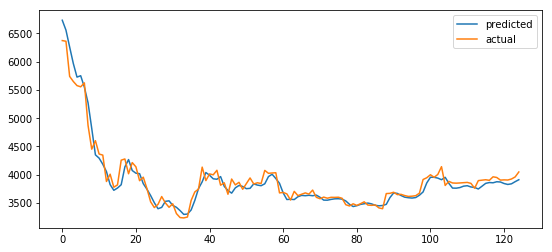

In [0]:
pyplot.figure(figsize=(9,4))
pyplot.plot(inv_yhat, label='predicted')
pyplot.plot(inv_y, label='true')
plt.legend(["predicted","actual"])

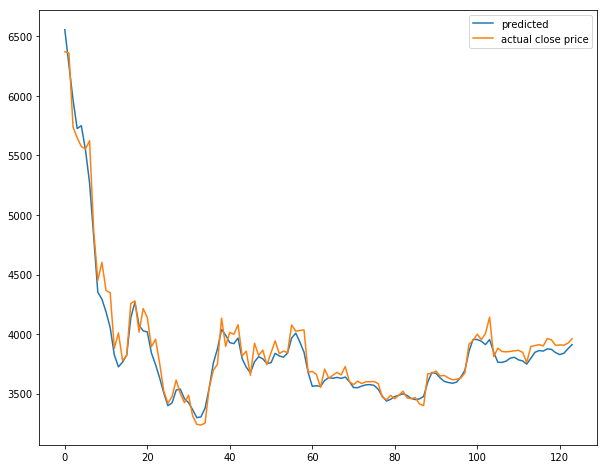

In [0]:
#shift predicted close price by 1 day left and compare with the previous actual price
pyplot.figure(figsize=(10,8))
pyplot.plot(inv_yhat[1:], label='predicted')
pyplot.plot(inv_y[:-1], label='true')
plt.legend(["predicted","actual close price"])

In [0]:
rmse = sqrt(mean_squared_error(inv_yhat, inv_y))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 136.003


In [0]:
predicted_trend = get_label(inv_yhat)
print(predicted_trend)

['Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise']


In [0]:
actual_trend = get_label(inv_y)
print(actual_trend)

['Fall', 'Fall', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Fall', 'Rise', 'Rise', 'Rise', 'Fall', 'Rise', 'Fall', 'Fall', 'Rise', 'Fall', 'Rise', 'Rise', 'Rise']


In [0]:
count=0
for i in range(len(predicted_trend)):
    if predicted_trend[i] == actual_trend[i]:
        count = count+1
print(count)

75


In [0]:
accuracy_rate = count/len(actual_trend)
print(accuracy_rate)

0.6048387096774194
